# 데이터 마이닝

## 1. 연관관계 분석

https://www.kirenz.com/post/2020-05-14-r-association-rule-mining/

In [5]:
library(arules)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [7]:
market_basket <-  
  list(  
  c("apple", "beer", "rice", "meat"),
  c("apple", "beer", "rice"),
  c("apple", "beer"), 
  c("apple", "pear"),
  c("milk", "beer", "rice", "meat"), 
  c("milk", "beer", "rice"), 
  c("milk", "beer"),
  c("milk", "pear")
  )

# set transaction names (T1 to T8)
names(market_basket) <- paste("T", c(1:8), sep = "")

In [8]:
trans <- as(market_basket, "transactions")

In [12]:
dim(trans)

[1] 8 6

In [13]:
itemLabels(trans)

[1] "apple" "beer"  "meat"  "milk"  "pear"  "rice"

In [92]:
summary(trans)

transactions as itemMatrix in sparse format with
 8 rows (elements/itemsets/transactions) and
 6 columns (items) and a density of 0.4583333 

most frequent items:
   beer   apple    milk    rice    meat (Other) 
      6       4       4       4       2       2 

element (itemset/transaction) length distribution:
sizes
2 3 4 
4 2 2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    2.00    2.50    2.75    3.25    4.00 

includes extended item information - examples:
  labels
1  apple
2   beer
3   meat

includes extended transaction information - examples:
  transactionID
1            T1
2            T2
3            T3

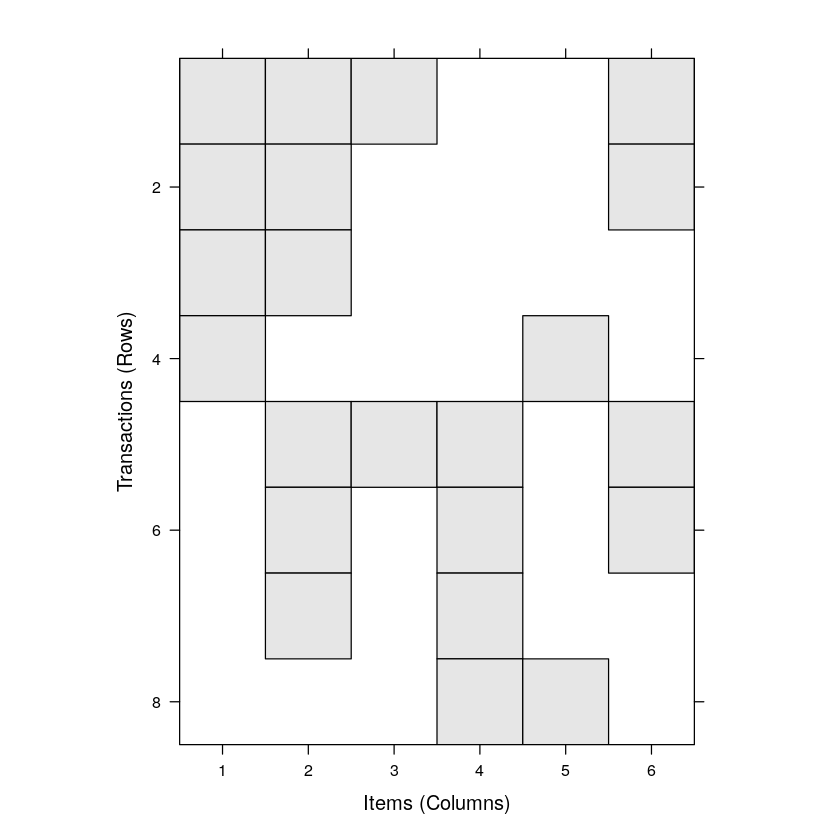

In [95]:
image(trans)

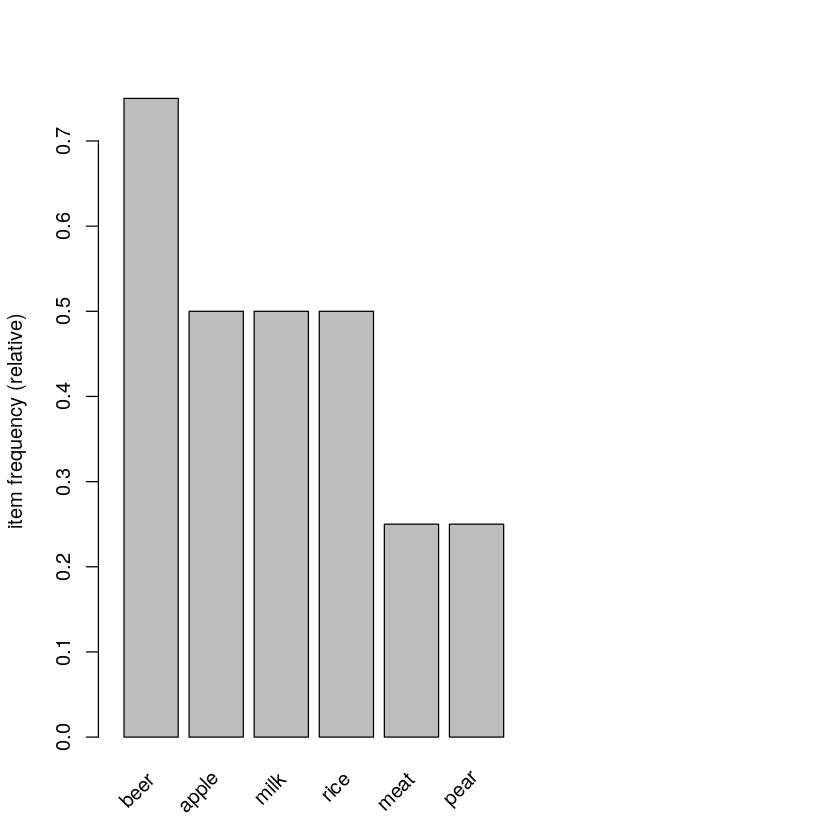

In [97]:
itemFrequencyPlot(trans, topN=10,  cex.names=1)

In [101]:
#Min Support 0.3, confidence as 0.5.
rules <- apriori(trans, 
                 parameter = list(supp=0.3, conf=0.5, 
                                  maxlen=10, 
                                  target= "rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.3      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 8 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [10 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [102]:
summary(rules)

set of 10 rules

rule length distribution (lhs + rhs):sizes
1 2 
4 6 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     1.0     2.0     1.6     2.0     2.0 

summary of quality measures:
    support        confidence        coverage           lift      
 Min.   :0.375   Min.   :0.5000   Min.   :0.5000   Min.   :1.000  
 1st Qu.:0.375   1st Qu.:0.5000   1st Qu.:0.5625   1st Qu.:1.000  
 Median :0.500   Median :0.5833   Median :0.7500   Median :1.000  
 Mean   :0.475   Mean   :0.6417   Mean   :0.7750   Mean   :1.067  
 3rd Qu.:0.500   3rd Qu.:0.7500   3rd Qu.:1.0000   3rd Qu.:1.000  
 Max.   :0.750   Max.   :1.0000   Max.   :1.0000   Max.   :1.333  
     count    
 Min.   :3.0  
 1st Qu.:3.0  
 Median :4.0  
 Mean   :3.8  
 3rd Qu.:4.0  
 Max.   :6.0  

mining info:
  data ntransactions support confidence
 trans             8     0.3        0.5
                                                                                           call
 apriori(data = trans, parameter = li

In [103]:
inspect(rules)

     lhs        rhs     support confidence coverage lift     count
[1]  {}      => {apple} 0.500   0.5000000  1.00     1.000000 4    
[2]  {}      => {milk}  0.500   0.5000000  1.00     1.000000 4    
[3]  {}      => {rice}  0.500   0.5000000  1.00     1.000000 4    
[4]  {}      => {beer}  0.750   0.7500000  1.00     1.000000 6    
[5]  {apple} => {beer}  0.375   0.7500000  0.50     1.000000 3    
[6]  {beer}  => {apple} 0.375   0.5000000  0.75     1.000000 3    
[7]  {milk}  => {beer}  0.375   0.7500000  0.50     1.000000 3    
[8]  {beer}  => {milk}  0.375   0.5000000  0.75     1.000000 3    
[9]  {rice}  => {beer}  0.500   1.0000000  0.50     1.333333 4    
[10] {beer}  => {rice}  0.500   0.6666667  0.75     1.333333 4    


### [연습문제]

In [87]:
df <- read.csv('csv/basket_analysis.csv')
df <- df[,2:ncol(df)]
m <- gsub('False',F,gsub('True',T,as.matrix(df)))
columns = colnames(m)
m <- t(apply(m,1,as.logical))
b <- apply(m,1,function(x){columns[x]})

In [90]:
trans2 <- as(b,'transactions')

In [91]:
itemLabels(trans2)

[1] "Apple"        "Bread"        "Butter"       "Cheese"       "chocolate"   
 [6] "Corn"         "Dill"         "Eggs"         "Ice.cream"    "Kidney.Beans"
[11] "Milk"         "Nutmeg"       "Onion"        "Sugar"        "Unicorn"     
[16] "Yogurt"

In [94]:
summary(trans2)

transactions as itemMatrix in sparse format with
 999 rows (elements/itemsets/transactions) and
 16 columns (items) and a density of 0.4032783 

most frequent items:
chocolate    Butter    Yogurt Ice.cream     Sugar   (Other) 
      421       420       420       410       409      4366 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13 
 59  63  72  81  99  99 132 115 115  82  55  23   4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   7.000   6.452   9.000  13.000 

includes extended item information - examples:
  labels
1  Apple
2  Bread
3 Butter

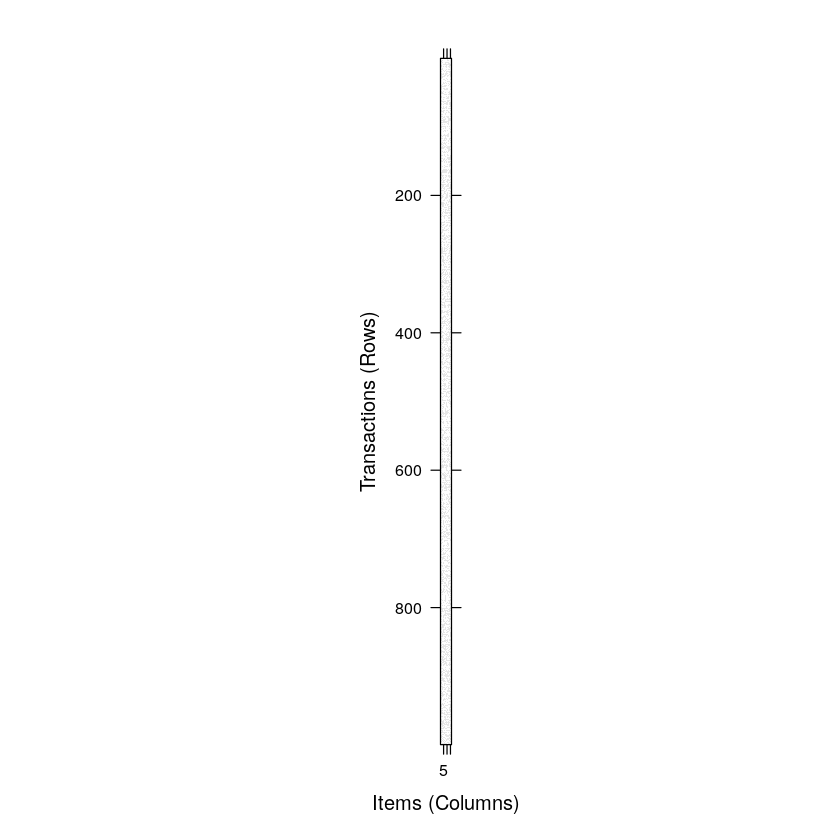

In [96]:
image(trans2)

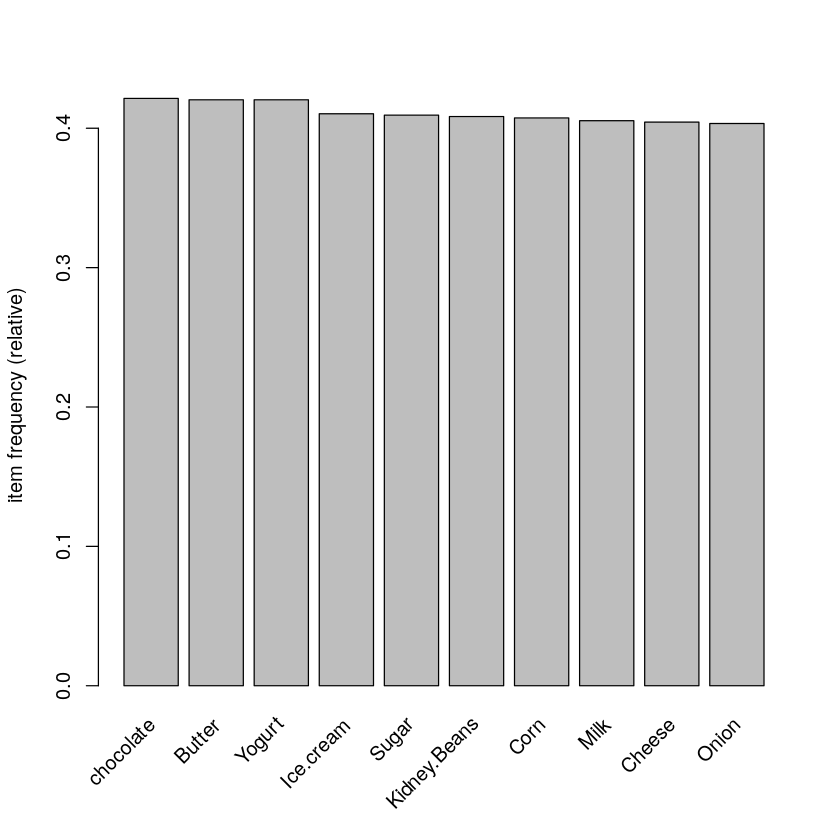

In [99]:
itemFrequencyPlot(trans2, topN=10,  cex.names=1)

In [111]:
#Min Support 0.3, confidence as 0.5.
rules2 <- apriori(trans2, 
                 parameter = list(supp=0.1, conf=0.1, 
                                  maxlen=10, 
                                  target= "rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 99 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[16 item(s), 999 transaction(s)] done [0.00s].
sorting and recoding items ... [16 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [355 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [112]:
summary(rules2)

set of 355 rules

rule length distribution (lhs + rhs):sizes
  1   2   3 
 16 240  99 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.234   3.000   3.000 

summary of quality measures:
    support         confidence        coverage           lift       
 Min.   :0.1001   Min.   :0.3829   Min.   :0.1682   Min.   :0.9962  
 1st Qu.:0.1061   1st Qu.:0.4410   1st Qu.:0.2072   1st Qu.:1.1101  
 Median :0.1792   Median :0.4668   Median :0.4014   Median :1.1413  
 Mean   :0.1704   Mean   :0.4717   Mean   :0.3721   Mean   :1.1637  
 3rd Qu.:0.1902   3rd Qu.:0.5037   3rd Qu.:0.4094   3rd Qu.:1.2327  
 Max.   :0.4214   Max.   :0.6012   Max.   :1.0000   Max.   :1.4285  
     count      
 Min.   :100.0  
 1st Qu.:106.0  
 Median :179.0  
 Mean   :170.3  
 3rd Qu.:190.0  
 Max.   :421.0  

mining info:
   data ntransactions support confidence
 trans2           999     0.1        0.1
                                                                                      

In [109]:
inspect(rules2)

      lhs                          rhs            support   confidence
[1]   {}                        => {Eggs}         0.3843844 0.3843844 
[2]   {}                        => {Bread}        0.3843844 0.3843844 
[3]   {}                        => {Apple}        0.3833834 0.3833834 
[4]   {}                        => {Unicorn}      0.3893894 0.3893894 
[5]   {}                        => {Dill}         0.3983984 0.3983984 
[6]   {}                        => {Cheese}       0.4044044 0.4044044 
[7]   {}                        => {Nutmeg}       0.4014014 0.4014014 
[8]   {}                        => {Onion}        0.4034034 0.4034034 
[9]   {}                        => {Corn}         0.4074074 0.4074074 
[10]  {}                        => {Kidney.Beans} 0.4084084 0.4084084 
[11]  {}                        => {Sugar}        0.4094094 0.4094094 
[12]  {}                        => {Milk}         0.4054054 0.4054054 
[13]  {}                        => {Ice.cream}    0.4104104 0.4104104 
[14]  